In [137]:
# IST652
#Dr. Block
#Project - LA Traffic
#Tyler Marsh, Jon Kaplan, John Fields
#September 4,2019

In [138]:
#Please see the project document in 2U which includes additional
#information on the introduction, data source, data 
#exploration/cleansing, comparison questions and conclusion.

In [139]:
# The goal for this project is...

In [140]:
import pandas as pd
import numpy as np
import ast
la = pd.read_csv('/Users/johnfields/Desktop/MyPythonFiles/Project/los-angeles-traffic-collision-data/traffic-collision-data-from-2010-to-present.csv')
la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481568 entries, 0 to 481567
Data columns (total 24 columns):
DR Number                            481568 non-null int64
Date Reported                        481568 non-null object
Date Occurred                        481568 non-null object
Time Occurred                        481568 non-null int64
Area ID                              481568 non-null int64
Area Name                            481568 non-null object
Reporting District                   481568 non-null int64
Crime Code                           481568 non-null int64
Crime Code Description               481568 non-null object
MO Codes                             396722 non-null object
Victim Age                           404022 non-null float64
Victim Sex                           474522 non-null object
Victim Descent                       473786 non-null object
Premise Code                         481543 non-null float64
Premise Description                  481543 non-null

In [141]:
la.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,191713007,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,1040,17,Devonshire,1788,997,TRAFFIC COLLISION,NaN,...,STREET,BALBOA BL,PARTHENIA ST,"{'latitude': '34.2285', 'human_address': '{""ad...",18914.0,119.0,1424.0,NaN,2.0,65.0
1,191913696,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,850,19,Mission,1924,997,TRAFFIC COLLISION,NaN,...,STREET,CREST KNOLL AV,EDGECLIFF DR,"{'latitude': '34.2905', 'human_address': '{""ad...",18912.0,57.0,244.0,NaN,1.0,47.0
2,191611704,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,910,16,Foothill,1693,997,TRAFFIC COLLISION,NaN,...,STREET,SATICOY ST,LAURELGROVE AV,"{'latitude': '34.2085', 'human_address': '{""ad...",8888.0,153.0,472.0,NaN,5.0,14.0
3,191913694,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,700,19,Mission,1964,997,TRAFFIC COLLISION,NaN,...,STREET,TOBIAS AV,NORDHOFF ST,"{'latitude': '34.2354', 'human_address': '{""ad...",19730.0,134.0,417.0,NaN,3.0,59.0
4,191514323,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,1200,15,N Hollywood,1513,997,TRAFFIC COLLISION,NaN,...,STREET,SHERMAN WY,BELLAIRE AV,"{'latitude': '34.2012', 'human_address': '{""ad...",8888.0,180.0,1503.0,NaN,5.0,71.0


In [142]:
la.dropna(inplace=True)

In [143]:
for col in la.columns: 
    print(col)

DR Number
Date Reported
Date Occurred
Time Occurred
Area ID
Area Name
Reporting District
Crime Code
Crime Code Description
MO Codes
Victim Age
Victim Sex
Victim Descent
Premise Code
Premise Description
Address
Cross Street
Location
Zip Codes
Census Tracts
Precinct Boundaries
LA Specific Plans
Council Districts
Neighborhood Councils (Certified)


In [144]:
#Drop the columns not used in the project
la = la.drop(['DR Number','Date Reported','Crime Code','MO Codes','Premise Code','Census Tracts','Precinct Boundaries','LA Specific Plans','Neighborhood Councils (Certified)'],axis=1)

In [145]:
for col in la.columns: 
    print(col)

Date Occurred
Time Occurred
Area ID
Area Name
Reporting District
Crime Code Description
Victim Age
Victim Sex
Victim Descent
Premise Description
Address
Cross Street
Location
Zip Codes
Council Districts


In [146]:
la.columns = ['DateOccurred', 'TimeOccurred', 'AreaID', 'AreaName','ReportingDistrict','CrimeCodeDescription', 'VictimAge', 'VictimSex', 'VictimRace', 'PremiseDescription', 'Address', 'CrossStreet', 'Location', 'ZipCode', 'CouncilDistricts']

In [147]:
for col in la.columns: 
    print(col)

DateOccurred
TimeOccurred
AreaID
AreaName
ReportingDistrict
CrimeCodeDescription
VictimAge
VictimSex
VictimRace
PremiseDescription
Address
CrossStreet
Location
ZipCode
CouncilDistricts


In [148]:
#Convert DateOccurred from object to datetime format and 
#TimeOccurred to integer value from 1-24
la.DateOccurred = pd.to_datetime(la.DateOccurred)
la["year"] = la.DateOccurred.dt.year
la["dayofweek"] = la.DateOccurred.dt.dayofweek
la.TimeOccurred = la.TimeOccurred.astype(str)
la.TimeOccurred = [i[:2] if len(i) == 4 else i[0] for i in la["TimeOccurred"]]
la.TimeOccurred = la.TimeOccurred.astype(int)

In [149]:
la.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104691 entries, 27 to 481546
Data columns (total 17 columns):
DateOccurred            104691 non-null datetime64[ns]
TimeOccurred            104691 non-null int64
AreaID                  104691 non-null int64
AreaName                104691 non-null object
ReportingDistrict       104691 non-null int64
CrimeCodeDescription    104691 non-null object
VictimAge               104691 non-null float64
VictimSex               104691 non-null object
VictimRace              104691 non-null object
PremiseDescription      104691 non-null object
Address                 104691 non-null object
CrossStreet             104691 non-null object
Location                104691 non-null object
ZipCode                 104691 non-null float64
CouncilDistricts        104691 non-null float64
year                    104691 non-null int64
dayofweek               104691 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(8)
memory usage: 14.4+ MB


In [150]:
la.head()

,DateOccurred,TimeOccurred,AreaID,AreaName,ReportingDistrict,CrimeCodeDescription,VictimAge,VictimSex,VictimRace,PremiseDescription,Address,CrossStreet,Location,ZipCode,CouncilDistricts,year,dayofweek
27,2019-07-19,11,18,Southeast,1835,TRAFFIC COLLISION,45.0,M,H,PARKING LOT,107TH ST,CENTRAL AV,"{'latitude': '33.9388', 'human_address': '{""ad...",22351.0,15.0,2019,4
47,2019-07-19,21,18,Southeast,1823,TRAFFIC COLLISION,57.0,M,B,STREET,CENTURY BL,SAN PEDRO ST,"{'latitude': '33.9456', 'human_address': '{""ad...",22352.0,14.0,2019,4
60,2019-07-19,17,12,77th Street,1265,TRAFFIC COLLISION,56.0,M,H,STREET,NORMANDIE,MANCHESTER,"{'latitude': '33.96', 'human_address': '{""addr...",23678.0,14.0,2019,4
67,2019-07-19,2,12,77th Street,1253,TRAFFIC COLLISION,27.0,M,H,STREET,FLORENCE AV,HARVARD BL,"{'latitude': '33.9746', 'human_address': '{""ad...",23678.0,14.0,2019,4
89,2019-07-18,20,5,Harbor,587,TRAFFIC COLLISION,40.0,F,O,STREET,PASEO DEL MAR ST,GAFFEY ST,"{'latitude': '33.7065', 'human_address': '{""ad...",3342.0,15.0,2019,3


In [151]:
la['Location'] = [ast.literal_eval(x) for x in la.Location]
la['longitude'] = [x['longitude'] for x in la.Location]
la['latitude'] = [x['latitude'] for x in la.Location]
la.longitude = la.longitude.astype(float)
la.latitude = la.latitude.astype(float)

In [152]:
la.head()

,DateOccurred,TimeOccurred,AreaID,AreaName,ReportingDistrict,CrimeCodeDescription,VictimAge,VictimSex,VictimRace,PremiseDescription,Address,CrossStreet,Location,ZipCode,CouncilDistricts,year,dayofweek,longitude,latitude
27,2019-07-19,11,18,Southeast,1835,TRAFFIC COLLISION,45.0,M,H,PARKING LOT,107TH ST,CENTRAL AV,"{'latitude': '33.9388', 'human_address': '{""ad...",22351.0,15.0,2019,4,-118.2535,33.9388
47,2019-07-19,21,18,Southeast,1823,TRAFFIC COLLISION,57.0,M,B,STREET,CENTURY BL,SAN PEDRO ST,"{'latitude': '33.9456', 'human_address': '{""ad...",22352.0,14.0,2019,4,-118.2695,33.9456
60,2019-07-19,17,12,77th Street,1265,TRAFFIC COLLISION,56.0,M,H,STREET,NORMANDIE,MANCHESTER,"{'latitude': '33.96', 'human_address': '{""addr...",23678.0,14.0,2019,4,-118.3003,33.9600
67,2019-07-19,2,12,77th Street,1253,TRAFFIC COLLISION,27.0,M,H,STREET,FLORENCE AV,HARVARD BL,"{'latitude': '33.9746', 'human_address': '{""ad...",23678.0,14.0,2019,4,-118.3068,33.9746
89,2019-07-18,20,5,Harbor,587,TRAFFIC COLLISION,40.0,F,O,STREET,PASEO DEL MAR ST,GAFFEY ST,"{'latitude': '33.7065', 'human_address': '{""ad...",3342.0,15.0,2019,3,-118.2928,33.7065


In [153]:
la = la.drop(['Location'],axis=1)

In [154]:
la.head()

,DateOccurred,TimeOccurred,AreaID,AreaName,ReportingDistrict,CrimeCodeDescription,VictimAge,VictimSex,VictimRace,PremiseDescription,Address,CrossStreet,ZipCode,CouncilDistricts,year,dayofweek,longitude,latitude
27,2019-07-19,11,18,Southeast,1835,TRAFFIC COLLISION,45.0,M,H,PARKING LOT,107TH ST,CENTRAL AV,22351.0,15.0,2019,4,-118.2535,33.9388
47,2019-07-19,21,18,Southeast,1823,TRAFFIC COLLISION,57.0,M,B,STREET,CENTURY BL,SAN PEDRO ST,22352.0,14.0,2019,4,-118.2695,33.9456
60,2019-07-19,17,12,77th Street,1265,TRAFFIC COLLISION,56.0,M,H,STREET,NORMANDIE,MANCHESTER,23678.0,14.0,2019,4,-118.3003,33.9600
67,2019-07-19,2,12,77th Street,1253,TRAFFIC COLLISION,27.0,M,H,STREET,FLORENCE AV,HARVARD BL,23678.0,14.0,2019,4,-118.3068,33.9746
89,2019-07-18,20,5,Harbor,587,TRAFFIC COLLISION,40.0,F,O,STREET,PASEO DEL MAR ST,GAFFEY ST,3342.0,15.0,2019,3,-118.2928,33.7065


In [155]:
la['age_by_decade'] = pd.cut(x=la['VictimAge'], bins=[19,29,39,49,59,69,79], labels=['20s','30s','40s','50s','60s','70s'])

In [156]:
la.head()

,DateOccurred,TimeOccurred,AreaID,AreaName,ReportingDistrict,CrimeCodeDescription,VictimAge,VictimSex,VictimRace,PremiseDescription,Address,CrossStreet,ZipCode,CouncilDistricts,year,dayofweek,longitude,latitude,age_by_decade
27,2019-07-19,11,18,Southeast,1835,TRAFFIC COLLISION,45.0,M,H,PARKING LOT,107TH ST,CENTRAL AV,22351.0,15.0,2019,4,-118.2535,33.9388,40s
47,2019-07-19,21,18,Southeast,1823,TRAFFIC COLLISION,57.0,M,B,STREET,CENTURY BL,SAN PEDRO ST,22352.0,14.0,2019,4,-118.2695,33.9456,50s
60,2019-07-19,17,12,77th Street,1265,TRAFFIC COLLISION,56.0,M,H,STREET,NORMANDIE,MANCHESTER,23678.0,14.0,2019,4,-118.3003,33.9600,50s
67,2019-07-19,2,12,77th Street,1253,TRAFFIC COLLISION,27.0,M,H,STREET,FLORENCE AV,HARVARD BL,23678.0,14.0,2019,4,-118.3068,33.9746,20s
89,2019-07-18,20,5,Harbor,587,TRAFFIC COLLISION,40.0,F,O,STREET,PASEO DEL MAR ST,GAFFEY ST,3342.0,15.0,2019,3,-118.2928,33.7065,40s


In [157]:
summary = la.describe()
summary = summary.transpose()
print(summary)

                      count          mean          std        min         25%  \
TimeOccurred       104691.0     13.660630     5.611858     1.0000     10.0000   
AreaID             104691.0     11.146632     5.402506     1.0000      8.0000   
ReportingDistrict  104691.0   1164.102616   537.683377   109.0000    833.0000   
VictimAge          104691.0     41.476956    16.094984    10.0000     28.0000   
ZipCode            104691.0  21849.062002  4798.298879  3221.0000  22721.0000   
CouncilDistricts   104691.0     10.501514     3.677316     1.0000      8.0000   
year               104691.0   2015.350565     2.323183  2010.0000   2014.0000   
dayofweek          104691.0      2.973369     1.956870     0.0000      1.0000   
longitude          104691.0   -118.348072     0.093530  -118.6502   -118.4210   
latitude           104691.0     34.031825     0.082299    33.7065     33.9789   

                          50%         75%         max  
TimeOccurred          14.0000     18.0000     23.000

In [158]:
la.dtypes

DateOccurred            datetime64[ns]
TimeOccurred                     int64
AreaID                           int64
AreaName                        object
ReportingDistrict                int64
CrimeCodeDescription            object
VictimAge                      float64
VictimSex                       object
VictimRace                      object
PremiseDescription              object
Address                         object
CrossStreet                     object
ZipCode                        float64
CouncilDistricts               float64
year                             int64
dayofweek                        int64
longitude                      float64
latitude                       float64
age_by_decade                 category
dtype: object

In [159]:
# Import matpolotlib for visualizations
import matplotlib.pyplot as plt
plt.close('all')

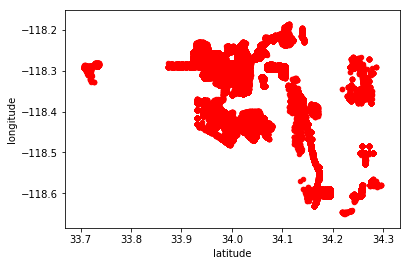

In [160]:
# Create plot of Latitude and Longitude of Accidents
la.plot(kind='scatter',x='latitude',y='longitude',color='red')
plt.show()

In [162]:
import plotly.graph_objs as go
import plotly.offline as offline

# Source of Map Code: https://towardsdatascience.com/famished-on-the-freeway-visualizing-mapping-la-restaurant-inspections-cb6bc8338111

In [168]:
mapbox_token="pk.eyJ1IjoianRmaWVsZHMiLCJhIjoiY2p5dWxxcXJxMDF3ZjNtcm9iYmkyZ2w2ZSJ9.353KtPjbC39lk9uVt3r8PQ"

In [167]:
#data parameters from the file to map
trace = go.Scattermapbox(lat = la["latitude"], lon = la["longitude"], marker=go.Marker(size=10), mode="markers+text")
data = [trace]

In [169]:
#define map layout - access token (API), which location map should be centered on
layout = go.Layout(mapbox=dict(accesstoken=mapbox_token, center=dict(lat=34.03, lon=-118.46), zoom=11.0))

In [170]:
#finalize data and layout
figure = go.Figure(data = data, layout = layout)

In [171]:
#draw the map NOTE: map will open in your default browser - new tab
offline.plot(figure)

'temp-plot.html'

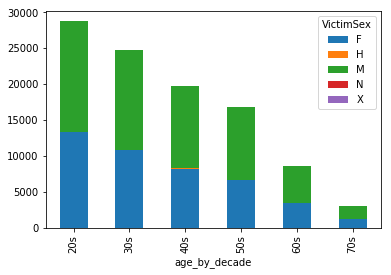

In [176]:
# Create a bar chart with the number of donors/non-donors by region
la.groupby(['age_by_decade','VictimSex']).size().unstack().plot(kind='bar',stacked=True)

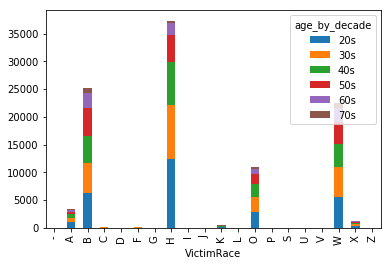

In [199]:
# Create bar chart by Victim Race and Age by Decade
la.groupby(['VictimRace','age_by_decade']).size().unstack().plot(kind='bar',stacked=True)
plt.show()